# CREDIT CARD FRAUD DETECTION USING NEURAL NETWORK

In [1]:
#importing libraries
import pandas as pd

In [2]:
# loading the dataset
df = pd.read_csv('/content/fraudTrain.csv')

In [3]:
df.shape

(27259, 23)

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', nan], dtype=object)

In [17]:
# 1. DELETING UNWANTED COLUMNS
df.drop(columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num',
                   'merchant', 'first', 'last','street', 'city', 'zip', 'lat', 'long', 'dob', 'trans_num', 'unix_time'],
        inplace = True)

In [19]:
df.drop(columns = ['merch_lat', 'merch_long'], inplace = True)

In [20]:
df.head()

,category,amt,gender,state,city_pop,job,is_fraud
0,misc_net,4.97,F,NC,3495.0,"Psychologist, counselling",0.0
1,grocery_pos,107.23,F,WA,149.0,Special educational needs teacher,0.0
2,entertainment,220.11,M,ID,4154.0,Nature conservation officer,0.0
3,gas_transport,45.00,M,MT,1939.0,Patent attorney,0.0
4,misc_pos,41.96,M,VA,99.0,Dance movement psychotherapist,0.0


In [21]:
# 2. Checking for null values
df.isna().sum()

category    0
amt         0
gender      0
state       1
city_pop    1
job         1
is_fraud    1
dtype: int64

In [22]:
df.dropna(inplace = True)

In [23]:
df.isna().sum()

category    0
amt         0
gender      0
state       0
city_pop    0
job         0
is_fraud    0
dtype: int64

In [24]:
# 3. CATEGORICAL TO NUMERICAL ENCODING
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [27]:
category_df = (pd.get_dummies(df['category'])).astype('int')

In [28]:
category_df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [31]:
df.drop(columns = ['category'], inplace = True)

In [32]:
df.head(3)

,amt,gender,state,city_pop,job,is_fraud
0,4.97,F,NC,3495.0,"Psychologist, counselling",0.0
1,107.23,F,WA,149.0,Special educational needs teacher,0.0
2,220.11,M,ID,4154.0,Nature conservation officer,0.0


In [33]:
df = pd.concat([df, category_df], axis = 1)

In [34]:
df.head(3)

,amt,gender,state,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,NC,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,F,WA,149.0,Special educational needs teacher,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,M,ID,4154.0,Nature conservation officer,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [36]:
df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)

In [37]:
df['gender'].unique()

array([1, 0])

In [38]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI'], dtype=object)

In [39]:
state_df = (pd.get_dummies(df['state'])).astype('int')

In [40]:
state_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
df.drop(columns = ['state'], inplace = True)

In [43]:
df = pd.concat([df, state_df], axis = 1)

In [45]:
df.head(3)

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,1,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149.0,Special educational needs teacher,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,220.11,0,4154.0,Nature conservation officer,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df['job'].unique().shape

(475,)

In [50]:
job_df = (pd.get_dummies(df['job'])).astype('int')

In [51]:
job_df.head()

,Academic librarian,"Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df.drop(columns = ['job'], inplace = True)

In [53]:
df = pd.concat([df, job_df], axis = 1)

In [54]:
df.shape

(27258, 543)

In [55]:
df.head(3)

,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,4.97,1,3495.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,0,4154.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# 4. Dividing the dataset into two parts
X = df.drop(columns = ['is_fraud'])
y = df['is_fraud']

In [57]:
X.shape

(27258, 542)

In [58]:
y.value_counts()

is_fraud
0.0    27003
1.0      255
Name: count, dtype: int64

In [59]:
# 5. Balancing the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

In [60]:
y.value_counts()

is_fraud
0.0    27003
1.0    27003
Name: count, dtype: int64

In [61]:
X.shape

(54006, 542)

In [62]:
# 6. Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [63]:
X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0.000334,1,0.001194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.008949,1,0.000043,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.018457,0,0.001421,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.003706,0,0.000659,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.003450,0,0.000026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# 7. Train - Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [65]:
X_train.shape, X_test.shape

((43204, 542), (10802, 542))

In [66]:
# 8. Building Artificial Neural Network
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    # input layer + hidden layer 1
    keras.layers.Dense(300, input_shape = (542,), activation = 'relu'),
    # hidden layer 2
    keras.layers.Dense(150, activation = 'relu'),
    #outpur layer
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, batch_size = 200)

Epoch 1/10
217/217 [==============================] - 4s 5ms/step - loss: 0.1104 - accuracy: 0.9702
Epoch 2/10
217/217 [==============================] - 1s 5ms/step - loss: 0.0161 - accuracy: 0.9959
Epoch 3/10
217/217 [==============================] - 1s 5ms/step - loss: 0.0128 - accuracy: 0.9967
Epoch 4/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0106 - accuracy: 0.9971
Epoch 5/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0093 - accuracy: 0.9975
Epoch 6/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 7/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0085 - accuracy: 0.9975
Epoch 8/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0079 - accuracy: 0.9979
Epoch 9/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9981
Epoch 10/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9981

In [68]:
# 9. Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

338/338 [==============================] - 1s 3ms/step - loss: 0.0105 - accuracy: 0.9977
Model Accuracy : 99.76856112480164


In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               162900    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 208201 (813.29 KB)
Trainable params: 208201 (813.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
pred = model.predict(X_test)

338/338 [==============================] - 1s 1ms/step


In [79]:
# 10. Prediction

In [76]:
binary_pred = (pred > 0.5).astype('int')

In [77]:
binary_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, binary_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5401
         1.0       1.00      1.00      1.00      5401

    accuracy                           1.00     10802
   macro avg       1.00      1.00      1.00     10802
weighted avg       1.00      1.00      1.00     10802



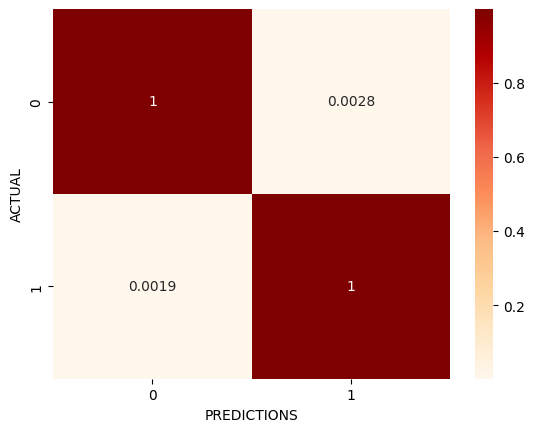

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


cf = confusion_matrix(y_test, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');